In [1]:
import pandas as pd
import datetime as dt
from prophet import Prophet

data = pd.read_csv("../raw_data/KO 2020-2021.csv",parse_dates = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-10,49.160000,49.270000,48.570000,48.619999,47.032063,15716600
1,2020-06-11,47.810001,47.919998,45.459999,45.540001,44.052662,26070400
2,2020-06-12,46.209999,46.250000,45.009998,45.599998,44.511440,21822700
3,2020-06-15,44.570000,46.450001,44.470001,46.299999,45.194729,15622300
4,2020-06-16,47.560001,47.689999,46.189999,46.770000,45.653511,18803500


In [2]:
data.shape

(252, 7)

In [3]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
import numpy as np

#stocks_df= data[(data.symbol=="JPM")]
#stocks_df= stocks_df[(data.date.dt.year == 2017) | (data.date.dt.year == 2018)]
#stocks_df= stocks_df[(stocks_df.date.dt.year > 2015 ) & (stocks_df.date.dt.year < 2021)]
#stocks_df.sort_values(by=["date"], inplace=True)
#stocks_df

In [6]:
#import numpy as np

#stocks_df= data[(data.symbol=="JPM")]
#stocks_df = stocks_df[(data.date.dt.year == 2016) | (data.date.dt.year == 2020)]
#stocks_df.sort_values(by=["date"], inplace=True)
#stocks_df

# Selectionner 10 actions de secteurs differents sur une periode de deux ans.
# GS,WMT,AAPL,AMZN,JPM,BA,CCL,CVX,KO,MSFT


In [7]:
data = data[["Date", "Adj Close"]].copy()  #à verifier, si il faut garder le .copy() ou pas
data.rename(columns={"Date": "ds", "Adj Close": "y"}, inplace=True)
data

,ds,y
0,2020-06-10,47.032063
1,2020-06-11,44.052662
2,2020-06-12,44.511440
3,2020-06-15,45.194729
4,2020-06-16,45.653511
...,...,...
247,2021-06-03,55.639999
248,2021-06-04,56.240002
249,2021-06-07,56.040001
250,2021-06-08,55.650002


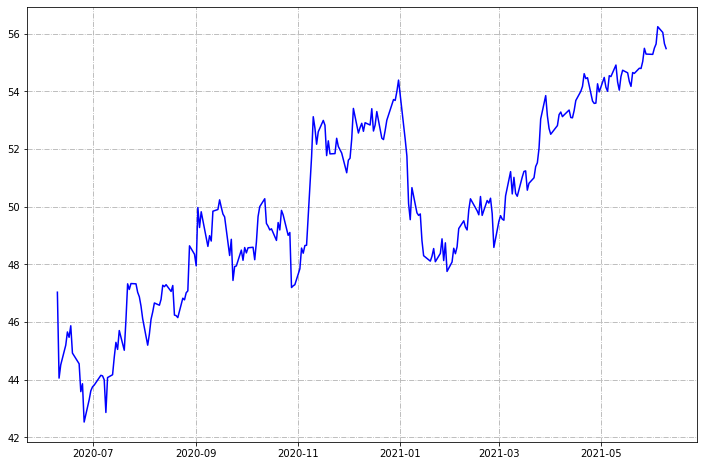

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(data['ds'], data['y'], 'b')
plt.show()

In [9]:
index=round(len(data)*80/100)
index

202

In [10]:
train = data.iloc[:index]
test = data.iloc[index:]

In [11]:
train.shape, test.shape

((202, 2), (50, 2))

In [12]:
train

,ds,y
0,2020-06-10,47.032063
1,2020-06-11,44.052662
2,2020-06-12,44.511440
3,2020-06-15,45.194729
4,2020-06-16,45.653511
...,...,...
197,2021-03-23,51.389999
198,2021-03-24,51.520000
199,2021-03-25,52.020000
200,2021-03-26,53.040001


In [13]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
horizon = 12
future = model.make_future_dataframe(periods=horizon, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
209,2021-11-01,65.360640,19.707556,116.229924
210,2021-12-01,67.184082,10.697027,128.770425
211,2022-01-01,-62.360841,-127.818412,-1.605858
212,2022-02-01,71.114901,-9.241877,155.329540
213,2022-03-01,72.844682,-19.629209,167.311407


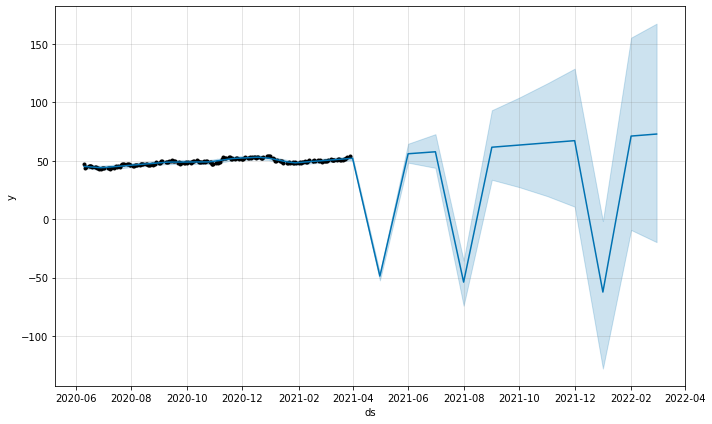

In [16]:
ax = model.plot(forecast);

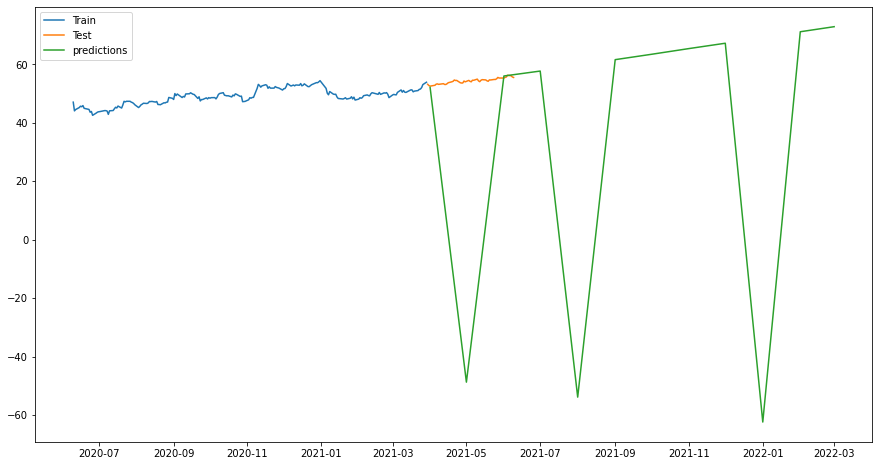

In [17]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

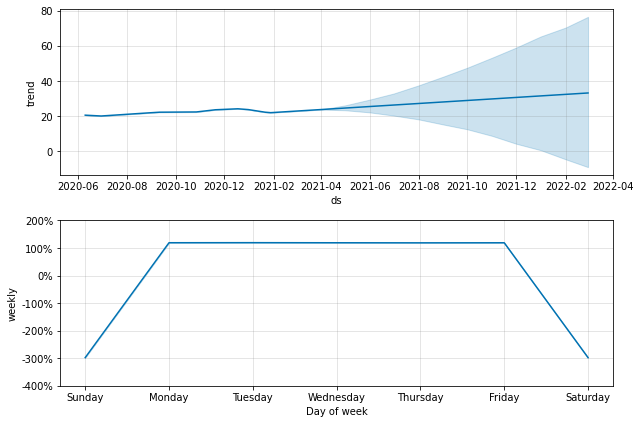

In [18]:
model.plot_components(forecast);

In [20]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
# Your code here
cv_results = cross_validation(model=model, initial=f'{20 * 5} days', horizon='35 days', period='180 days')

# Comment choisir le chiffre initial {XX*5} et horizon 'XX days' (ici initial=20 et horizon=75)

INFO:prophet:Making 1 forecasts with cutoffs between 2021-02-22 00:00:00 and 2021-02-22 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-23,48.186079,45.878610,50.481631,50.122807,2021-02-22
1,2021-02-24,48.058633,45.602788,50.523476,50.291405,2021-02-22
2,2021-02-25,47.962562,45.614760,50.205320,49.755859,2021-02-22
3,2021-02-26,47.933461,45.602284,50.223705,48.585602,2021-02-22
4,2021-03-01,47.735809,45.469792,50.119428,49.488091,2021-02-22
5,2021-03-02,47.753562,45.420698,50.263382,49.686440,2021-02-22
6,2021-03-03,47.626707,45.155087,49.863797,49.567429,2021-02-22
7,2021-03-04,47.530945,45.075641,49.979293,49.527760,2021-02-22
8,2021-03-05,47.501550,45.177736,49.784085,50.370743,2021-02-22
9,2021-03-08,47.304012,45.054810,49.764266,51.213726,2021-02-22


In [22]:
data_p = performance_metrics(cv_results)
data_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,4.368093,2.089998,2.084750,0.041518,0.041518,0.042403,1.0
1,3 days,4.100591,2.024992,2.013034,0.040219,0.040219,0.041054,1.0
2,4 days,1.820601,1.349296,1.222719,0.024732,0.024732,0.025108,1.0
3,7 days,1.747891,1.322078,1.202212,0.024415,0.024415,0.024780,1.0
4,8 days,3.403255,1.844791,1.842580,0.037155,0.037155,0.037860,1.0
5,9 days,3.751209,1.936804,1.936800,0.039027,0.039027,0.039804,1.0
6,10 days,3.876836,1.968968,1.968769,0.039735,0.039735,0.040541,1.0
7,11 days,6.109768,2.471794,2.433004,0.048639,0.048639,0.049889,0.5
8,14 days,11.759066,3.429149,3.389453,0.066651,0.066651,0.069001,0.0
9,15 days,12.507388,3.536579,3.514417,0.069090,0.069090,0.071591,0.0


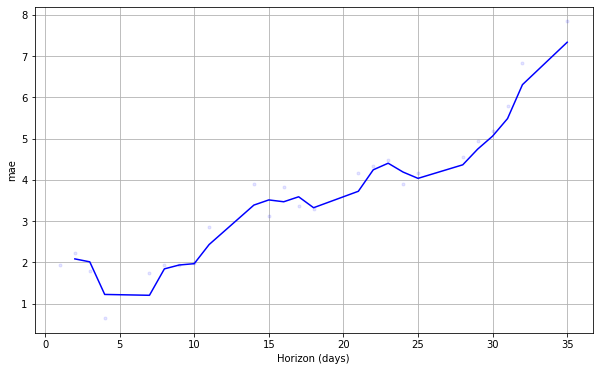

In [23]:
# Plot results below
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_results, metric='mae');